## read the dataset

In [1]:
import pandas as pd

df = pd.read_csv('../Datasets/spam.csv')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


## drop column Unnamed: 2 - Unnamed: 4

In [2]:
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## rename column v1 and v2

In [3]:
df.rename(columns={'v1':'target','v2':'message'}, inplace=True)

In [4]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## show countplot column target

In [5]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

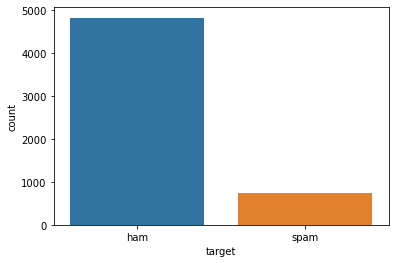

In [6]:
import seaborn as sns

sns.countplot(x='target', data=df);

- target column have imbalanced data

## show simple EDA

In [7]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.message[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
spam_list = df.message.tolist()

In [10]:
df.isna().sum()

target     0
message    0
dtype: int64

## make wordcloud

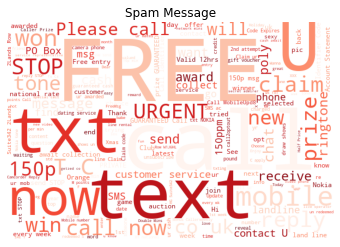

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_spam = df[df['target'] == 'spam']
data_ham = df[df['target'] == 'ham']

def make_wc(data_spam_ham, title):
    text = ' '.join(data_spam_ham['message'].astype(str).tolist())
    spam_wc = WordCloud(max_font_size = 160, margin=0, width=600, height=400, background_color = "white", colormap="Reds").generate(text)
    plt.imshow(spam_wc)
    plt.axis('off')
    plt.title(title)
    plt.show()

make_wc(data_spam, 'Spam Message')

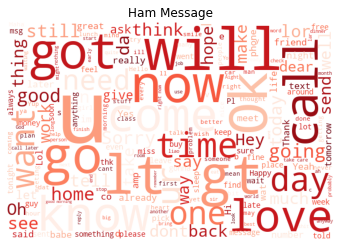

In [12]:
make_wc(data_ham, 'Ham Message')

## building model classification

In [13]:
# firstly make target column to biner 0 or 1
from sklearn.preprocessing import LabelBinarizer
import numpy as np

biner = np.array(df['target'])

lb = LabelBinarizer()
biner = lb.fit_transform(biner)
biner = biner.flatten()
biner

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
df['spam_or_ham'] = biner
df

,target,message,spam_or_ham
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will �_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [15]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = df['message']
y = df['spam_or_ham']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

cv = CountVectorizer()
features = cv.fit_transform(X_train.values)

model = RandomForestClassifier(n_estimators=100)
model.fit(features, y_train)
acc = cv.transform(X_test)
print('acc is: ', model.score(acc, y_test))

acc is:  0.9766177270255574


In [16]:
model.predict(acc[16])

array([0])

In [17]:
model.predict(acc[6])

array([0])

In [18]:
pd.unique(model.predict(acc))

array([0, 1])

In [19]:
pred = pd.DataFrame(model.predict(acc), columns=['predicted'])
pred

,predicted
0,0
1,0
2,0
3,0
4,1
...,...
1834,0
1835,0
1836,0
1837,0


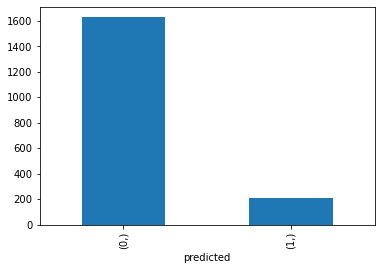

In [20]:
pred.value_counts().plot(kind='bar')
plt.show()

In [21]:
df

,target,message,spam_or_ham
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will �_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [22]:
emails = [
    'You Have a Refund Coming',
    'A Family Member Needs Help',
    'Bitcoin, Anyone?'
]

pred = cv.transform(emails)
model.predict(pred)

array([0, 0, 0])

In [23]:
df[df['target'] == 'spam']

,target,message,spam_or_ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [24]:
df['message'][16]

"Oh k...i'm watching here:)"

In [25]:
model.predict(acc[16])

array([0])

## handle imbalanced data

In [26]:
from sklearn.utils import resample

In [27]:
df_major = df[df.spam_or_ham == 0]
df_minor = df[df.spam_or_ham == 1]

df_upsample = resample(
    df_minor,
    replace=True,
    n_samples=4825,
    random_state=100
)

df_new = pd.concat([df_major,df_upsample])

df_new.spam_or_ham.value_counts()

0    4825
1    4825
Name: spam_or_ham, dtype: int64

In [56]:
X_bal = df_new['message']
y_bal = df_new['spam_or_ham']

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.4, random_state=4)

cv_bal = CountVectorizer()
features_bal = cv_bal.fit_transform(X_train_bal.values)

model_bal = RandomForestClassifier(n_estimators=100)
model_bal.fit(features_bal, y_train_bal)
acc_bal = cv_bal.transform(X_test_bal)
print('acc is: ', model_bal.score(acc_bal, y_test_bal))

acc is:  0.9994818652849741


In [62]:
df_new[df_new.spam_or_ham == 1]

,target,message,spam_or_ham
3904,spam,Do you want a new video handset? 750 anytime a...,1
540,spam,from www.Applausestore.com MonthlySubscription...,1
2573,spam,Congrats 2 mobile 3G Videophones R yours. call...,1
366,spam,"Update_Now - Xmas Offer! Latest Motorola, Sony...",1
4256,spam,important information 4 orange user . today is...,1
...,...,...,...
5196,spam,Spook up your mob with a Halloween collection ...,1
3528,spam,Xmas & New Years Eve tickets are now on sale f...,1
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...,1
1117,spam,"449050000301 You have won a �2,000 price! To c...",1


In [63]:
df_new.message[1117]

1117    449050000301 You have won a �2,000 price! To c...
1117    449050000301 You have won a �2,000 price! To c...
1117    449050000301 You have won a �2,000 price! To c...
1117    449050000301 You have won a �2,000 price! To c...
1117    449050000301 You have won a �2,000 price! To c...
Name: message, dtype: object

In [72]:
emails = [
    'URGENT your grandson was arrested ast night in Mexico. Need bail money immediately Western Union Wire $9,500 http://goo.gl/mdf5543',
    'Conratulations! You\'ve won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now.',
    'Hello mia, whatsup'
]
bal = cv_bal.transform(emails)
model_bal.predict(bal)

array([1, 1, 0])